In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob,os
import seaborn as sns
%matplotlib inline

In [3]:
#read data
data_psy= pd.read_csv('Youtube01-Psy.csv')
data_perry= pd.read_csv('Youtube02-KatyPerry.csv')
data_lmfao= pd.read_csv('Youtube03-LMFAO.csv')
data_eminem=pd.read_csv('Youtube04-Eminem.csv')
data_shakira=pd.read_csv('Youtube05-Shakira.csv')

In [4]:
data = pd.concat([data_psy,data_perry,data_lmfao,data_eminem,data_shakira])

In [5]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [6]:
data.shape

(1956, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
COMMENT_ID    1956 non-null object
AUTHOR        1956 non-null object
DATE          1711 non-null object
CONTENT       1956 non-null object
CLASS         1956 non-null int64
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [8]:
data= data.drop(['COMMENT_ID', 'AUTHOR','DATE'], axis=1)

In [9]:
data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [10]:
data['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

### Visualisation

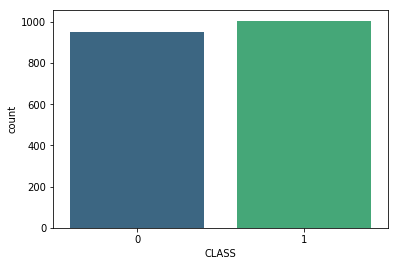

In [10]:
sns.countplot(x='CLASS',data=data,palette='viridis')

In [11]:
spam_match = ["check my video", "follow me", "watch my videos","subscribe","please share","check out","my channel","my page",
            "giftcard","promos","sex","channel","new track","attention","subs","check","like them","new album","hack",
            "vote","please listen","join me","help me","help","youtube","gay","share","fuck","make money","visit","donate",
            "trailer","free","channel","instagram","facebook","soundcloud","support","website","www","http","https",".com","check this out" ]

In [12]:
def check_spam_words(content):
    res=[x for x in spam_match if(x in content.lower())]
    return bool(res)

In [13]:
data['check_spam']= data.CONTENT.apply(check_spam_words)

In [14]:
data.head()

,CONTENT,CLASS,check_spam
0,"Huh, anyway check out this you[tube] channel: ...",1,True
1,Hey guys check out my new channel and our firs...,1,True
2,just for test I have to say murdev.com,1,True
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,True
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,True


#### In above I added some words which are often used in spam comments. then I checked to what  extent it is true that if the class is spam it contains one of the mentioned words 

C:\Users\leeno\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


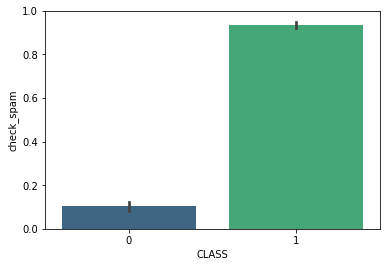

In [15]:
sns.barplot(x='CLASS', y='check_spam', data=data,palette='viridis')

This shows that many contents which labeled as spam contain the spam words which we define

In [16]:
data['Content_len'] = data['CONTENT'].str.len()


In [17]:
data

,CONTENT,CLASS,check_spam,Content_len
0,"Huh, anyway check out this you[tube] channel: ...",1,True,56
1,Hey guys check out my new channel and our firs...,1,True,166
2,just for test I have to say murdev.com,1,True,38
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,True,48
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,True,39
5,"Hey, check out my new website!! This site is a...",1,True,82
6,Subscribe to my channel ﻿,1,True,25
7,i turned it on mute as soon is i came on i jus...,0,True,78
8,You should check my channel for Funny VIDEOS!!﻿,1,True,47
9,and u should.d check my channel and tell me wh...,1,True,67


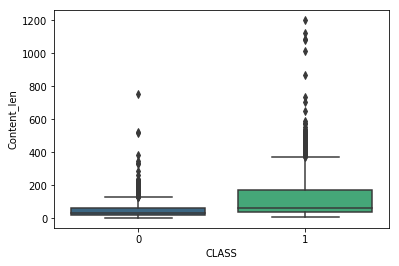

In [18]:
sns.boxplot(x='CLASS', y='Content_len', data=data,palette='viridis')

Here we could say that, the longer the message length, the more likely it is to be spam. 

In [19]:
data_1=data[data['CLASS']==1]
data_0=data[data['CLASS']==0]

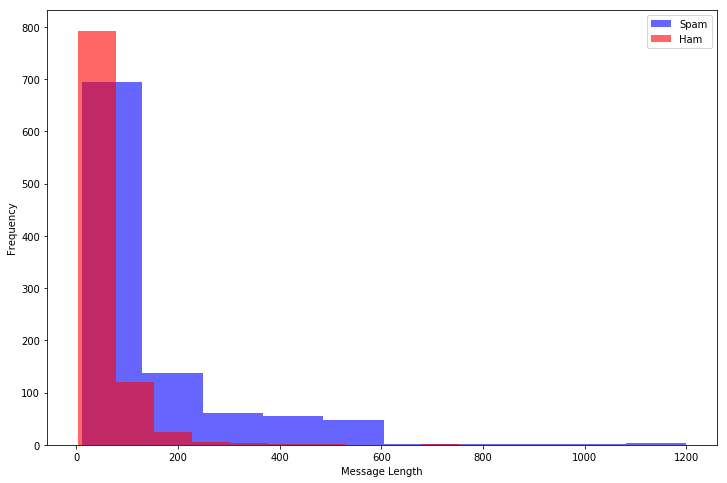

In [20]:
plt.figure(figsize=(12, 8))

data_1['Content_len'].plot(kind='hist', color='blue',label='Spam', alpha=0.6)
data_0['Content_len'].plot(kind='hist', color='red', label='Ham', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()


This shows that comments that have larger length are more likey to be spam

In [21]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def text_clean(mess):

    STOPWORDS = stopwords.words('english') 
    #Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    #Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    #remove stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leeno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
data['Clean_content'] = data.CONTENT.apply(text_clean).str.lower()

In [23]:
data.head()

,CONTENT,CLASS,check_spam,Content_len,Clean_content
0,"Huh, anyway check out this you[tube] channel: ...",1,True,56,huh anyway check youtube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,1,True,166,hey guys check new channel first vid us monkey...
2,just for test I have to say murdev.com,1,True,38,test say murdevcom
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,True,48,shaking sexy ass channel enjoy ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,True,39,watchvvtarggvgtwq check ﻿


In [24]:
X = data.Clean_content
y = data.CLASS

In [25]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1467,)
(1467,)
(489,)
(489,)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_vectorized = vect.fit_transform(X_train)

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid_transformer = TfidfTransformer()
final_X_train = tfid_transformer.fit_transform(X_train_vectorized)

In [29]:
X_test_vectorized = vect.transform(X_test)


In [30]:
final_X_test = tfid_transformer.transform(X_test_vectorized)


In [31]:
final_X_train

<1467x3366 sparse matrix of type '<class 'numpy.float64'>'
	with 11107 stored elements in Compressed Sparse Row format>

In [32]:
final_X_test

<489x3366 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [33]:
print(final_X_train.shape)
print(final_X_test.shape)


(1467, 3366)
(489, 3366)


## Build,train and evaluate models

### Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_model = MultinomialNB()
nb_model.fit(final_X_train,y_train)
nb_pred = nb_model.predict(final_X_test)
nb_accuracy = metrics.accuracy_score(y_test,nb_pred)
nb_matrix = metrics.confusion_matrix(y_test,nb_pred)
nb_f1_score = metrics.f1_score(y_test,nb_pred)

In [35]:
print(nb_accuracy)
print(nb_f1_score)
print(nb_matrix)

0.8813905930470347
0.8901515151515152
[[196  33]
 [ 25 235]]


In [36]:
from sklearn.naive_bayes import BernoulliNB
nbb = BernoulliNB()
nbb.fit(final_X_train, y_train)
nbb_pred = nbb.predict(final_X_test)
nbb_accuracy = metrics.accuracy_score(y_test,nbb_pred)
print(nbb_accuracy)

0.8568507157464212


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(final_X_train,y_train)
lr_pred = lr_model.predict(final_X_test)
lr_accuracy = metrics.accuracy_score(y_test,lr_pred)
lr_matrix = metrics.confusion_matrix(y_test,lr_pred)
lr_f1_score = metrics.f1_score(y_test,lr_pred)

In [38]:
print(lr_accuracy)
print(lr_f1_score)
print(lr_matrix)

0.8916155419222904
0.8898128898128899
[[222   7]
 [ 46 214]]


### Stochastic Gradient Descent

In [39]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='modified_huber', penalty='l2',
                     alpha=1e-3, random_state=42)
sgd_model.fit(final_X_train,y_train)
sgd_pred = sgd_model.predict(final_X_test)
sgd_accuracy = metrics.accuracy_score(y_test,sgd_pred)
sgd_matrix = metrics.confusion_matrix(y_test,sgd_pred)
sgd_f1_score = metrics.f1_score(y_test,sgd_pred)

C:\Users\leeno\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [40]:
print(sgd_accuracy)
print(sgd_f1_score)
print(sgd_matrix)

0.8977505112474438
0.8987854251012146
[[217  12]
 [ 38 222]]


### Gradient Boosting

In [41]:
from sklearn.ensemble import  GradientBoostingClassifier
gb_model= GradientBoostingClassifier()
gb_model.fit(final_X_train,y_train)
gb_pred = gb_model.predict(final_X_test)
gb_accuracy = metrics.accuracy_score(y_test,gb_pred)
gb_matrix = metrics.confusion_matrix(y_test,gb_pred)
gb_f1_score = metrics.f1_score(y_test,gb_pred)

C:\Users\leeno\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [42]:
print(gb_accuracy)
print(gb_f1_score)
print(gb_matrix)

0.8936605316973415
0.8912133891213389
[[224   5]
 [ 47 213]]


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(final_X_train,y_train)
rf_pred = rf_model.predict(final_X_test)
rf_accuracy = metrics.accuracy_score(y_test,rf_pred)
rf_matrix = metrics.confusion_matrix(y_test,rf_pred)
rf_f1_score = metrics.f1_score(y_test,rf_pred)

In [44]:
print(rf_accuracy)
print(rf_f1_score)
print(rf_matrix)

0.8936605316973415
0.8930041152263375
[[220   9]
 [ 43 217]]


### SVM with linear kernel

In [45]:
from sklearn.svm import SVC
svc_model = SVC(gamma = 'auto',kernel='linear',C = 1.0)
svc_model.fit(final_X_train,y_train)
svc_pred = svc_model.predict(final_X_test)
svc_accuracy = metrics.accuracy_score(y_test,svc_pred)
svc_matrix = metrics.confusion_matrix(y_test,svc_pred)
svc_f1_score = metrics.f1_score(y_test,svc_pred)

In [46]:
print(svc_accuracy)
print(svc_f1_score)
print(svc_matrix)

0.8916155419222904
0.8916155419222904
[[218  11]
 [ 42 218]]


### SVM with polynomial kernel

In [47]:
svc_model_poly = SVC(gamma = 0.01,kernel='poly',degree=2,coef0=155)
svc_model_poly.fit(final_X_train,y_train)
svc_pred_poly = svc_model_poly.predict(final_X_test)
svc_accuracy_poly = metrics.accuracy_score(y_test,svc_pred_poly)
svc_matrix_poly = metrics.confusion_matrix(y_test,svc_pred_poly)
svc_f1_score_poly = metrics.f1_score(y_test,svc_pred_poly)

In [48]:
print(svc_accuracy_poly)
print(svc_f1_score_poly)
print(svc_matrix_poly)

0.8957055214723927
0.896551724137931
[[217  12]
 [ 39 221]]


### Extra Trees 

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
extree_model=ExtraTreesClassifier()
extree_model.fit(final_X_train, y_train)

extree_pred = extree_model.predict(final_X_test)
extree_accuracy = metrics.accuracy_score(y_test,extree_pred)
extree_matrix = metrics.confusion_matrix(y_test,extree_pred)
extree_f1_score = metrics.f1_score(y_test,extree_pred)

In [50]:
print(extree_accuracy)
print(extree_f1_score)
print(extree_matrix)

0.8834355828220859
0.8784648187633263
[[226   3]
 [ 54 206]]


### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=40)
dt_model.fit(final_X_train, y_train)

dt_pred = dt_model.predict(final_X_test)
dt_accuracy = metrics.accuracy_score(y_test,dt_pred)
dt_matrix = metrics.confusion_matrix(y_test,dt_pred)
dt_f1_score = metrics.f1_score(y_test,dt_pred)

In [52]:
print(dt_accuracy)
print(dt_f1_score)
print(dt_matrix)

0.8916155419222904
0.8933601609657947
[[214  15]
 [ 38 222]]


In [53]:
# making the summary table of train accuracy.
test_accuracy = pd.DataFrame({'Test_accuracy(%)':[nb_accuracy, lr_accuracy, sgd_accuracy, rf_accuracy, svc_accuracy,svc_accuracy_poly,extree_accuracy,dt_accuracy,gb_accuracy ]})
test_accuracy.index = ['Naive Bayesian', 'Logistic Regression','Stochastic Gradient Decent', 'Random Forest', 'SVC_linear','SVC_Polynomial','Exta Trees','Decision Tree','Gradient Boosting']
sorted_test_accuracy = test_accuracy.sort_values(by = 'Test_accuracy(%)', ascending = False)

In [54]:
sorted_test_accuracy

,Test_accuracy(%)
Stochastic Gradient Decent,0.897751
SVC_Polynomial,0.895706
Random Forest,0.893661
Gradient Boosting,0.893661
Logistic Regression,0.891616
SVC_linear,0.891616
Decision Tree,0.891616
Exta Trees,0.883436
Naive Bayesian,0.881391


## Parameter tuning

In [55]:
# 1. For logistic regression
lr_params = {'C': np.logspace(0, 2, 4, 8 ,10),'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'random_state': [0]}

# 2. For Gradient Boosting Classifier
gb_params = {'learning_rate': [0.01, 0.5, 0.7], 'random_state': [0],
             'max_depth': [3,4,5], 'n_estimators': [395, 400, 405]}

# 3. For Decision-Tree
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [15, 20, 30], 
             'min_samples_leaf':[1, 5 , 10, 15],
             'random_state':[46]}
# 4. For Random_Forest
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[350,450,550],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 13, 23], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[0,46],
             'max_depth':[2,12,22]}
# 5. For SVC with linear kernel
svc_params = {'C': [0.1,1,5,10], 
              'gamma': [ 1, 0.1, 0.01,0.001]
             }

# 6. For Xtra Trees
extree_params = {'n_estimators':[145,147,200], 'min_samples_split':[20,25],
                 'max_features':['auto','sqrt','log2'], 
                 'random_state': [0]}



In [56]:
def tune_hyperparameters(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global tuned_parameters, tuned_score
    
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, param_grid, verbose = 3, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(final_X_train, y_train)
    tuned_parameters, tuned_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return tuned_parameters, tuned_score

### Logistic Regression

In [57]:
tune_hyperparameters(lr_model, param_grid=lr_params)
lr_tuned_parameters, lr_tuned_score =  tuned_parameters, tuned_score
print('Logistic Regression Best Score:', lr_tuned_score)
print('And Best Parameters:', lr_tuned_parameters)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 169 out of 200 | elapsed:   10.8s remaining:    1.9s


Logistic Regression Best Score: 89.23
And Best Parameters: {'C': 21.544346900318832, 'random_state': 0, 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.2s finished


### Gradient Boosting

In [58]:
tune_hyperparameters(gb_model, param_grid=gb_params)
gb_tuned_parameters, gb_tuned_score =  tuned_parameters, tuned_score
print('Gradient Boosting Best Score:', gb_tuned_score)
print('And Best Parameters:', gb_tuned_parameters)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.6min finished


Gradient Boosting Best Score: 89.16
And Best Parameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 405, 'random_state': 0}


### Decision Tree

In [59]:
tune_hyperparameters(dt_model, param_grid=dt_params)
dt_tuned_parameters, dt_tuned_score =  tuned_parameters, tuned_score
print('Decision Tree Best Score:', dt_tuned_score)
print('And Best Parameters:', dt_tuned_parameters)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   13.3s


Decision Tree Best Score: 86.3
And Best Parameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 46}


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   13.6s finished


### Random Forest

In [60]:
tune_hyperparameters(rf_model, param_grid=rf_params)
rf_tuned_parameters, rf_tuned_score =  tuned_parameters, tuned_score
print('Decision Tree Best Score:', rf_tuned_score)
print('And Best Parameters:', rf_tuned_parameters)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3840 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 4576 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 8160 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 9216 tasks      | elapsed: 19.6

Decision Tree Best Score: 89.16
And Best Parameters: {'criterion': 'gini', 'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 450, 'random_state': 46}


### Linear SVM

In [61]:
tune_hyperparameters(svc_model, param_grid=svc_params)
svc_tuned_parameters, svc_tuned_score =  tuned_parameters, tuned_score
print('SVM Best Score:', svc_tuned_score)
print('And Best Parameters:', svc_tuned_parameters)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   11.5s


SVM Best Score: 88.96
And Best Parameters: {'C': 1, 'gamma': 1}


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   12.2s finished


### Extra Tree

In [62]:
tune_hyperparameters(extree_model, param_grid=extree_params)
extree_tuned_parameters, extree_tuned_score =  tuned_parameters, tuned_score
print('Extra Trees Best Score:', extree_tuned_score)
print('And Best Parameters:', extree_tuned_parameters)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   41.5s finished


Extra Trees Best Score: 90.05
And Best Parameters: {'max_features': 'auto', 'min_samples_split': 25, 'n_estimators': 145, 'random_state': 0}


In [63]:
tunned_scores = pd.DataFrame({'Tuned_score(%)': [lr_tuned_score, gb_tuned_score, dt_tuned_score, rf_tuned_score, svc_tuned_score,extree_tuned_score]})
tunned_scores.index = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest', 'SVC', 'Extra Tress']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tuned_score(%)', ascending = False)
sorted_tunned_scores



,Tuned_score(%)
Extra Tress,90.05
Logistic Regression,89.23
Gradient Boosting,89.16
Random Forest,89.16
SVC,88.96
Decision Tree,86.30


In [64]:
#initiate the models again with tuned hyper parameters
lr_tuned_model  = LogisticRegression(**lr_tuned_parameters)
gb_tuned_model = GradientBoostingClassifier(**gb_tuned_parameters)
dt_tuned_model  = DecisionTreeClassifier(**dt_tuned_parameters)
rf_tuned_model  = RandomForestClassifier(**rf_tuned_parameters)
svc_tuned_model = SVC(**svc_tuned_parameters)
extree_tuned_model = ExtraTreesClassifier(**extree_tuned_parameters)

In [65]:
# Logistinc Regression
lr_tuned_model.fit(final_X_train,y_train)
lr_tuned_pred = lr_tuned_model.predict(final_X_test)
lr_tuned_accuracy = metrics.accuracy_score(y_test,lr_tuned_pred)
lr_tuned_matrix = metrics.confusion_matrix(y_test,lr_tuned_pred)
lr_tuned_f1_score = metrics.f1_score(y_test,lr_tuned_pred)

In [66]:
print(lr_tuned_accuracy)
print(lr_tuned_f1_score)
print(lr_tuned_matrix)


0.8936605316973415
0.8934426229508197
[[219  10]
 [ 42 218]]


In [67]:
# Gradient Boosting
gb_tuned_model.fit(final_X_train,y_train)
gb_tuned_pred = gb_tuned_model.predict(final_X_test)
gb_tuned_accuracy = metrics.accuracy_score(y_test,gb_tuned_pred)
gb_tuned_matrix = metrics.confusion_matrix(y_test,gb_tuned_pred)
gb_tuned_f1_score = metrics.f1_score(y_test,gb_tuned_pred)

In [68]:
print(gb_tuned_accuracy)
print(gb_tuned_f1_score)
print(gb_tuned_matrix)


0.8834355828220859
0.8819875776397516
[[219  10]
 [ 47 213]]


In [69]:
# Decision Tree
dt_tuned_model.fit(final_X_train,y_train)
dt_tuned_pred = dt_tuned_model.predict(final_X_test)
dt_tuned_accuracy = metrics.accuracy_score(y_test,dt_tuned_pred)
dt_tuned_matrix = metrics.confusion_matrix(y_test,dt_tuned_pred)
dt_tuned_f1_score = metrics.f1_score(y_test,dt_tuned_pred)

In [70]:
print(dt_tuned_accuracy)
print(dt_tuned_f1_score)
print(dt_tuned_matrix)

0.8507157464212679
0.8548707753479126
[[201  28]
 [ 45 215]]


In [71]:
# Random Forest
rf_tuned_model.fit(final_X_train,y_train)
rf_tuned_pred = rf_tuned_model.predict(final_X_test)
rf_tuned_accuracy = metrics.accuracy_score(y_test,rf_tuned_pred)
rf_tuned_matrix = metrics.confusion_matrix(y_test,rf_tuned_pred)
rf_tuned_f1_score = metrics.f1_score(y_test,rf_tuned_pred)

In [72]:
print(rf_tuned_accuracy)
print(rf_tuned_f1_score)
print(rf_tuned_matrix)

0.8997955010224948
0.8977035490605427
[[225   4]
 [ 45 215]]


In [73]:
#SVM
svc_tuned_model.fit(final_X_train,y_train)
svc_tuned_pred = svc_tuned_model.predict(final_X_test)
svc_tuned_accuracy = metrics.accuracy_score(y_test,svc_tuned_pred)
svc_tuned_matrix = metrics.confusion_matrix(y_test,svc_tuned_pred)
svc_tuned_f1_score = metrics.f1_score(y_test,svc_tuned_pred)

In [74]:
print(svc_tuned_accuracy)
print(svc_tuned_f1_score)
print(svc_tuned_matrix)

0.8957055214723927
0.8944099378881988
[[222   7]
 [ 44 216]]


In [75]:
# Extra tree
extree_tuned_model.fit(final_X_train,y_train)
extree_tuned_pred = extree_tuned_model.predict(final_X_test)
extree_tuned_accuracy = metrics.accuracy_score(y_test,extree_tuned_pred)
extree_tuned_matrix = metrics.confusion_matrix(y_test,extree_tuned_pred)
extree_tuned_f1_score = metrics.f1_score(y_test,extree_tuned_pred)

In [76]:
print(extree_tuned_accuracy)
print(extree_tuned_f1_score)
print(extree_tuned_matrix)

0.8977505112474438
0.8975409836065574
[[220   9]
 [ 41 219]]


In [77]:
accuracy_before_tunning=[lr_accuracy,gb_accuracy,rf_accuracy,svc_accuracy,dt_accuracy,extree_accuracy]
accuracy_after_tunning=[lr_tuned_accuracy,gb_tuned_accuracy,rf_tuned_accuracy,svc_tuned_accuracy,
                        dt_tuned_accuracy,extree_tuned_accuracy]


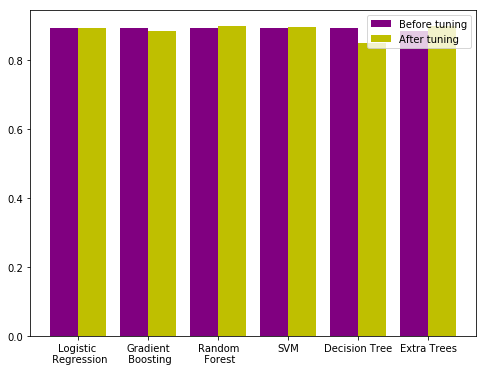

In [78]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
width =0.4

N=6
ind = np.arange(N)

plt.bar(ind,accuracy_before_tunning,width=width,color="purple",label='Before tuning')
plt.bar(ind+width,accuracy_after_tunning,width=width,color="y",label='After tuning')

plt.xticks(ind + width / 2, ('Logistic \n Regression','Gradient\n Boosting','Random\n Forest','SVM','Decision Tree',
           'Extra Trees'))
plt.legend(loc='best')

plt.show()